# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


## Inicialización

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import math as mt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Carga los datos

El conjunto de datos se almacena en la carpeta `/datasets/faces/` 
- La carpeta `final_files` con 7600 fotos 
- El archivo `labels.csv` con etiquetas, con dos columnas: `file_name` y `real_age` 
Dado que el número de archivos de imágenes es bastante elevado, se recomienda evitar leerlos todos a la vez, ya que esto consumiría muchos recursos computacionales. Te recomendamos crear un generador con ImageDataGenerator. Este método se explicó en el capítulo 3, lección 7 de este curso.

El archivo de etiqueta se puede cargar como un archivo CSV habitual.

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

Found 7591 validated image filenames.


## EDA

In [4]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [5]:
labels

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17
...,...,...
7586,007608.jpg,14
7587,007609.jpg,37
7588,007610.jpg,28
7589,007611.jpg,20


In [6]:
labels.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


In [7]:
age_count = labels.groupby('real_age').count()
age_count

,file_name
real_age,
1,149
2,88
3,25
4,101
5,87
...,...
94,5
95,2
96,2


In [8]:
labels.query('real_age < 60').groupby('real_age').count()

,file_name
real_age,
1,149
2,88
3,25
4,101
5,87
6,68
7,67
8,44
9,34


In [9]:
labels.query('real_age > 60').groupby('real_age').count()

,file_name
real_age,
61,28
62,28
63,20
64,23
65,36
66,18
67,18
68,15
69,18


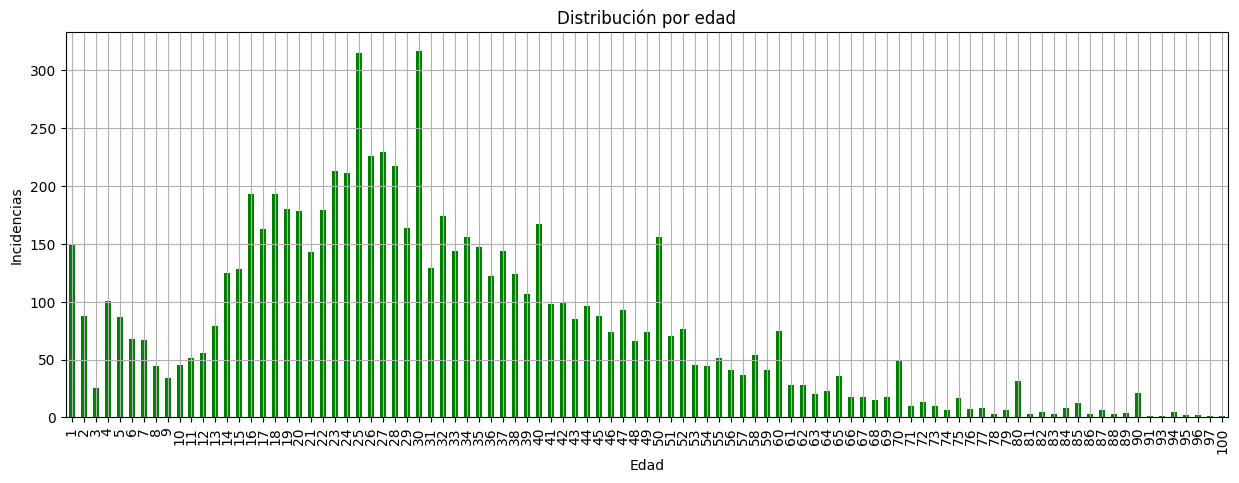

In [10]:
age_count.plot(title='Distribución por edad', xlabel='Edad', ylabel='Incidencias', grid=True, legend=False, kind='bar', color='green', figsize=(15,5))
plt.show()

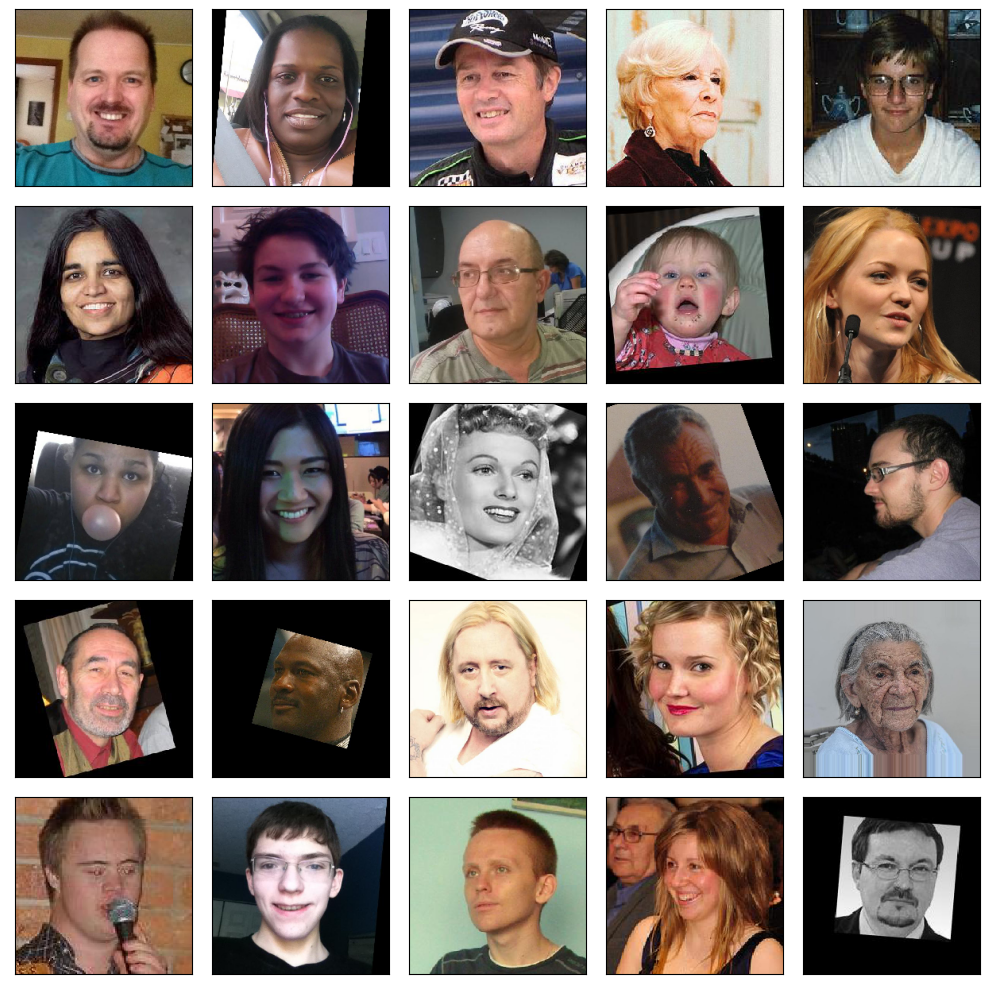

In [11]:
features, target = next(train_gen_flow)

fig = plt.figure(figsize=(10,10))
for i in range(25):
    fig.add_subplot(5, 5, i+1)
    plt.imshow(features[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

### Conclusiones

Se aprecia que el volumen importante de imagenets se concentra entre el año de edad y los sesenta años ya que por motivos naturales la probabilidad de que haya un gran número de personas mayores de sesenta es baja.

En cuanto a las imágenes, podemos observar diferentes tipos, fotos a color, blanco y negro, con inclinaciones o perfiladas hacia la derecha o izquierda.

También observamos diferentes tipos de rasgos de las personas retratadas, en cuanto a edades, color de piel y cabello o género.

## Modelado

Define las funciones necesarias para entrenar tu modelo en la plataforma GPU y crea un solo script que las contenga todas junto con la sección de inicialización.

Para facilitar esta tarea, puedes definirlas en este notebook y ejecutar un código listo en la siguiente sección para componer automáticamente el script.

Los revisores del proyecto también verificarán las definiciones a continuación, para que puedan comprender cómo construiste el modelo.

In [12]:
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [13]:
def load_train(path):
    
    """
    Carga la parte de entrenamiento del conjunto de datos desde la ruta.
    """
    
    labels = pd.read_csv(path + 'labels.csv')

    train_datagen = ImageDataGenerator(
        rescale=1./255,
        horizontal_flip=True,
        vertical_flip=True)

    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory= path +'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=12345)

    return train_gen_flow

In [14]:
def load_test(path):
    
    """
    Carga la parte de validación/prueba del conjunto de datos desde la ruta
    """
    
    labels = pd.read_csv(path + 'labels.csv')

    valid_datagen = ImageDataGenerator(rescale=1./255)

    test_gen_flow = valid_datagen.flow_from_dataframe(
        dataframe=labels,
        directory= path +'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        seed=12345)

    return test_gen_flow

In [15]:
def create_model(input_shape):
    
    """
    Define el modelo
    """
    
    m_res = ResNet50(
    input_shape=input_shape,
    weights='imagenet',
    include_top= False)
    
    model = Sequential()
    
    model.add(m_res)
    
    model.add(GlobalAveragePooling2D())
    
    model.add(Dense(1, activation='relu'))
    
    optimizer= Adam(learning_rate=0.001)
    
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

    return model

In [16]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    """
    Entrena el modelo dados los parámetros
    """
    
    model.fit(train_data,
             validation_data=test_data,
             batch_size=batch_size,
             epochs=epochs,
             steps_per_epoch=steps_per_epoch,
             validation_steps=validation_steps,
             verbose=2)

    return model

## Prepara el script para ejecutarlo en la plataforma GPU

Una vez que hayas definido las funciones necesarias, puedes redactar un script para la plataforma GPU, descargarlo a través del menú "File|Open..." (Archivo|Abrir) y cargarlo más tarde para ejecutarlo en la plataforma GPU.

Nota: el script debe incluir también la sección de inicialización. A continuación se muestra un ejemplo.

In [17]:
# prepara un script para ejecutarlo en la plataforma GPU

init_str = """
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

labels = pd.read_csv('/datasets/faces/labels.csv')

train_datagen = ImageDataGenerator(rescale=1./255)

train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        seed=12345)

def load_train(path):
    
    labels = pd.read_csv(path + 'labels.csv')

    train_datagen = ImageDataGenerator(
        rescale=1./255,
        horizontal_flip=True,
        vertical_flip=True)

    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory= path +'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=12345)

    return train_gen_flow


def load_test(path):
    
    labels = pd.read_csv(path + 'labels.csv')

    valid_datagen = ImageDataGenerator(rescale=1./255)

    test_gen_flow = valid_datagen.flow_from_dataframe(
        dataframe=labels,
        directory= path +'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        seed=12345)

    return test_gen_flow

path = '/datasets/faces/'


def create_model(input_shape):
    
    m_res = ResNet50(
    input_shape=input_shape,
    weights='imagenet',
    include_top= False)
    
    model = Sequential()
    
    model.add(m_res)
    
    model.add(GlobalAveragePooling2D())
    
    model.add(Dense(1, activation='relu'))
    
    optimizer= Adam(learning_rate=0.001)
    
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

    return model


def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    model.fit(train_data,
             validation_data=test_data,
             batch_size=batch_size,
             epochs=epochs,
             steps_per_epoch=steps_per_epoch,
             validation_steps=validation_steps,
             verbose=2)

    return model



tr_path = '/datasets/faces/'
input_shape = (224, 224, 3)

train_set = load_train(tr_path)
test_set = load_test(tr_path)
model = create_model(input_shape)
model = train_model(model, train, test)
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')

### El resultado

Coloca el resultado de la plataforma GPU como una celda Markdown aquí.

No logro correr el programa de manera local

## Conclusiones

# Lista de control

- [ ]  El Notebook estaba abierto 
- [ ]  El código no tiene errores
- [ ]  Las celdas con el código han sido colocadas en el orden de ejecución
- [ ]  Se realizó el análisis exploratorio de datos 
- [ ]  Los resultados del análisis exploratorio de datos se presentan en el notebook final 
- [ ]  El valor EAM del modelo no es superior a 8 
- [ ]  El código de entrenamiento del modelo se copió en el notebook final 
- [ ]  El resultado de entrenamiento del modelo se copió en el notebook final 
- [ ] Los hallazgos se proporcionaron con base en los resultados del entrenamiento del modelo

## Comentario general del revisor 

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a>  
    
¡Muy bien logrado! Has completado un proyecto que refleja un sólido entendimiento tanto del procesamiento de imágenes como del entrenamiento de modelos de deep learning en GPU. Este tipo de trabajo te acerca a cómo se desarrollan soluciones reales en el mundo de la inteligencia artificial.

### Sobre el análisis exploratorio y la preparación de datos

Comenzaste con una exploración detallada del dataset, identificando rangos etarios, sesgos en la distribución y observando ejemplos visuales. Este enfoque demuestra criterio y madurez técnica: conocer a fondo los datos es fundamental para diseñar un modelo robusto y ajustado a la realidad del problema.

Además, utilizaste correctamente `ImageDataGenerator` para evitar la sobrecarga de memoria y aplicar aumentos que enriquecen el entrenamiento del modelo. Es una decisión práctica y profesional, especialmente en problemas donde la variabilidad visual impacta directamente en el rendimiento.

### Sobre ResNet y tu modelo final

Elegiste una arquitectura de vanguardia como **ResNet50**, que ha sido clave en los avances de visión por computadora. Usar esta red con pesos preentrenados y congelar las capas adecuadas es una estrategia que muestra que comprendes el valor del *transfer learning*. También es destacable que hayas definido funciones claras para cargar los datos, construir el modelo y ejecutar el entrenamiento: esto hace tu trabajo más ordenado, replicable y adaptable.

### Por qué es importante saber entrenar en GPU y desde scripts

El entrenamiento de modelos en la nube con GPU es una habilidad práctica cada vez más valorada. Tu script está bien estructurado y preparado para ejecutarse eficientemente en plataformas como Google Colab o entornos empresariales. Aprender a trabajar de esta forma te prepara para desarrollos escalables, colaborativos y con tiempos de entrenamiento razonables, que son el estándar en la industria actual del machine learning.

### Conclusión

Este proyecto refleja que no solo entiendes los conceptos de aprendizaje profundo, sino que sabes aplicarlos de manera ordenada, práctica y profesional. Has completado un reto que implica visión por computadora, trabajo con imágenes, transferencia de conocimiento y entrenamiento en GPU. Sin duda, es un paso importante en tu camino como científico de datos o ingeniero de machine learning.

</div>
